In [155]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [114]:
input = sc.textFile("../Data/Interim/main_competitions.csv")
head = input.first()
#fields_head = head.map(lambda line: line.split(","))
tail = input.filter(lambda row : row != head)
fields = tail.map(lambda line: line.split(","))


In [115]:
#header2 = [header[0],header[1],header[2],header[5],header[6],header[9]]
                             
match = fields.map(lambda x: (x[0].encode('ascii','ignore'),
                              x[1].encode('ascii','ignore'),
                              x[2].encode('ascii','ignore'),
                              x[5].encode('ascii','ignore'),
                              x[6].encode('ascii','ignore'),
                              x[9].encode('ascii','ignore')
                             ))

In [118]:
print ("First row:")
print ("Country, Competition,Season,HomeTeam,AwayTeam,Result")
print (match.take(1))

First row:
Country, Competition,Season,HomeTeam,AwayTeam,Result
[('Netherlands', 'Eredivisie', '2016-2017', 'Nijmegen', 'Zwolle', 'D')]


In [120]:
countries = match.map(lambda x: x[0]).distinct()
print ("Countries: " + str(countries.count()))
print (countries.collect())

Countries: 10
['Turkey', 'Netherlands', 'Italy', 'Portugal', 'Scotland', 'France', 'Germany', 'Belgium', 'England', 'Spain']


In [122]:
seasons = match.map(lambda x: (x[0], x[1], x[2])).distinct()
print ("Seasons: "+ str(seasons.count()))
print (seasons.take(30))

Seasons: 281
[('Germany', 'Liga1', '2017-2018'), ('Germany', 'Liga1', '2008-2009'), ('England', 'Premier', '2010-2011'), ('Spain', 'Segunda', '2005-2006'), ('England', 'Premier', '2011-2012'), ('France', 'Division2', '2009-2010'), ('England', 'League1', '2011-2012'), ('Germany', 'Liga2', '2009-2010'), ('England', 'League1', '2014-2015'), ('Netherlands', 'Eredivisie', '2003-2004'), ('Germany', 'Liga1', '2013-2014'), ('France', 'LeChampionnat', '2016-2017'), ('England', 'Premier', '2014-2015'), ('Scotland', 'Division2', '2011-2012'), ('France', 'Division2', '2016-2017'), ('Portugal', 'Liga1', '2008-2009'), ('Germany', 'Liga2', '2016-2017'), ('England', 'League2', '2005-2006'), ('Scotland', 'Premier', '2017-2018'), ('Spain', 'Segunda', '2014-2015'), ('Italy', 'SerieA', '2006-2007'), ('Italy', 'SerieB', '2005-2006'), ('Scotland', 'Division1', '2010-2011'), ('Portugal', 'Liga1', '2015-2016'), ('England', 'League2', '2006-2007'), ('Scotland', 'Division1', '2015-2016'), ('France', 'LeChampion

In [123]:
season2 = match.map(lambda x: ((x[0], x[1]), x[2])).distinct()
seasonmax = season2.reduceByKey(max)
seasonmin = season2.reduceByKey(min)
seasoncount = sc.parallelize(season2.countByKey().items())
seasonagg = seasonmin.join(seasonmax).join(seasoncount)
seasonaggr = seasonagg.map(lambda x: (x[0][0],x[0][1],x[1][0][0],x[1][0][1],x[1][1]))

print ("Seasons by country and competition:")
print ("Country, Competition, Min season, Max season, Count season")
print (seasonaggr.take(10))

Seasons by country and competition:
Country, Competition, Min season, Max season, Count season
[('Scotland', 'Division2', '2003-2004', '2017-2018', 15), ('Netherlands', 'Eredivisie', '2003-2004', '2017-2018', 13), ('Germany', 'Liga2', '2005-2006', '2017-2018', 13), ('Spain', 'Segunda', '2005-2006', '2017-2018', 12), ('Italy', 'SerieB', '2005-2006', '2017-2018', 13), ('England', 'Conference', '2005-2006', '2017-2018', 13), ('England', 'League2', '2005-2006', '2017-2018', 13), ('England', 'Championship', '2003-2004', '2017-2018', 14), ('Germany', 'Liga1', '2004-2005', '2017-2018', 14), ('Scotland', 'Division3', '2005-2006', '2017-2018', 13)]


In [125]:
teams = match.map(lambda x: x[4]).distinct()
print ("Teams: " + str(teams.count()))
print (teams.take(60))

Teams: 586
['Leixoes', 'Fleetwood Town', 'Arouca', 'Bologna', 'Torino', 'Queens Park', 'Dundee', 'Ancona', 'Red Star', 'Ipswich', 'Rochdale', 'Lleida', 'Academica', 'VVV Venlo', 'Schalke 04', 'Standard', 'Denizlispor', 'Albinoleffe', 'Gravesend', 'Tranmere', 'Bury', 'Caen', 'Olhanense', 'Luton', 'Montrose', 'Solihull', 'Hibernian', 'Ross County', 'Rushden & D', 'Gimnastic', 'Chesterfield', 'Galatasaray', 'Est Amadora', 'Brescia', 'Exeter', 'Trofense', 'Sevilla B', 'Hartlepool', 'Niort', 'Vecindario', 'Hercules', 'Oftasspor', 'Roda JC', 'Hereford', 'Barrow', 'Strasbourg', 'Nimes', 'Xerez', 'Hacettepespor', 'Aves', 'Paris SG', 'Kaiserslautern ', 'Cordoba', 'Kilmarnock', 'Bristol Rvs', 'Hamilton', 'Sedan', 'Cittadella', 'Grenoble', 'Stevenage']


In [126]:
teams2 = match.map(lambda x: ((x[0], x[1]),x[4])).distinct()
teamsagg = teams2.countByKey().items()

print ("Teams by country and competition:")
print ("Country, Competition, Count teams")
print (teamsagg)                    

Teams by country and competition:
Country, Competition, Count teams
[(('Germany', 'Liga1'), 34), (('Scotland', 'Division3'), 21), (('Scotland', 'Premier'), 19), (('Scotland', 'Division2'), 27), (('Belgium', 'JupilerLeague'), 30), (('Netherlands', 'Eredivisie'), 28), (('Germany', 'Liga2'), 52), (('France', 'Division2'), 47), (('Spain', 'Segunda'), 64), (('Italy', 'SerieA'), 38), (('England', 'Premier'), 39), (('Turkey', 'FutbolLigi1'), 41), (('Spain', 'Primera'), 40), (('Portugal', 'Liga1'), 31), (('England', 'League1'), 64), (('England', 'Championship'), 58), (('Italy', 'SerieB'), 67), (('England', 'Conference'), 78), (('France', 'LeChampionnat'), 39), (('Scotland', 'Division1'), 27), (('England', 'League2'), 62)]


In [139]:
def matchPoints(result, type):
    if result == type:
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

team_point_home = match.map(lambda x: (x[3], matchPoints(x[5], "H")))
team_point_away = match.map(lambda x: (x[4], matchPoints(x[5], "A")))
team_point = team_point_home.union(team_point_away)
print (team_point.take(10))

[('Nijmegen', 1), ('Den Haag', 3), ('Twente', 0), ('Utrecht', 0), ('Willem II', 0), ('AZ Alkmaar', 1), ('Groningen', 0), ('Roda', 1), ('Sparta Rotterdam', 0), ('Heerenveen', 1)]


In [140]:
team_total = team_point.reduceByKey(lambda x, y: x+y)
print (team_total.take(10))

[('Canvey Island', 51), ('Mersin Idman Yurdu', 132), ('Leixoes', 66), ('Gimnastic', 466), ('Triestina', 301), ('Diyarbakirspor', 127), ('Scarborough', 37), ('Queens Park', 643), ('Ath Madrid', 948), ('Barnet', 741)]


In [141]:
top_team = team_total.takeOrdered(20, key=lambda t: -t[1])
print ("Top 20 teams global:")
print (top_team)

Top 20 teams global:
[('Barcelona', 1225), ('Real Madrid', 1190), ('Celtic', 1156), ('Juventus', 1081), ('Bayern Munich', 1077), ('Rangers', 1050), ('Man United', 1042), ('Chelsea', 1020), ('Fenerbahce', 1008), ('Lyon', 1007), ('Sheffield United', 990), ('Paris SG', 975), ('Ajax', 974), ('PSV Eindhoven', 973), ('Porto', 965), ('Cardiff', 957), ('Benfica', 953), ('Roma', 949), ('Ath Madrid', 948), ('Arsenal', 939)]


In [174]:
grafic_team = sc.parallelize(top_team)

print (grafic_team.keys().collect())
print (grafic_team.values().collect())


['Barcelona', 'Real Madrid', 'Celtic', 'Juventus', 'Bayern Munich', 'Rangers', 'Man United', 'Chelsea', 'Fenerbahce', 'Lyon', 'Sheffield United', 'Paris SG', 'Ajax', 'PSV Eindhoven', 'Porto', 'Cardiff', 'Benfica', 'Roma', 'Ath Madrid', 'Arsenal']
[1225, 1190, 1156, 1081, 1077, 1050, 1042, 1020, 1008, 1007, 990, 975, 974, 973, 965, 957, 953, 949, 948, 939]


['Barcelona', 'Real Madrid', 'Celtic', 'Juventus', 'Bayern Munich', 'Rangers', 'Man United', 'Chelsea', 'Fenerbahce', 'Lyon', 'Sheffield United', 'Paris SG', 'Ajax', 'PSV Eindhoven', 'Porto', 'Cardiff', 'Benfica', 'Roma', 'Ath Madrid', 'Arsenal']
[1225, 1190, 1156, 1081, 1077, 1050, 1042, 1020, 1008, 1007, 990, 975, 974, 973, 965, 957, 953, 949, 948, 939]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


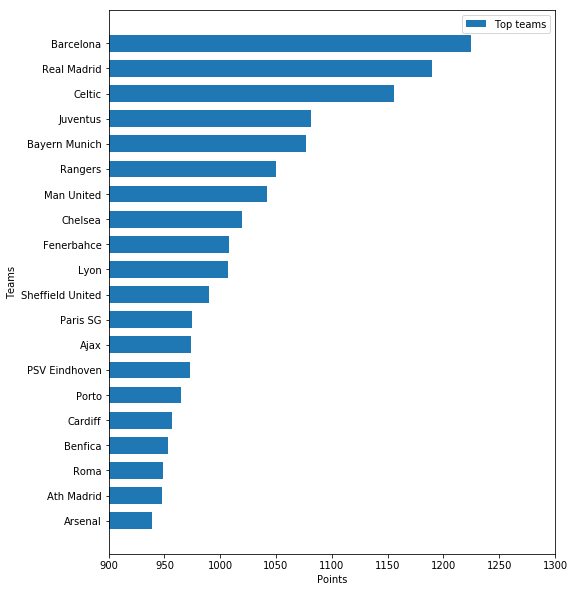

In [193]:
teams_list = grafic_team.keys().collect()
print (teams_list)
points_list = grafic_team.values().collect()
print (points_list)
y_pos = np.arange(len(teams_list))
print y_pos

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.barh(y_pos, points_list, 1/1.5, label="Top teams")
axes = plt.gca()
axes.set_xlim([900, 1300])
axes.set_yticks(y_pos)
axes.set_yticklabels(teams_list)
axes.invert_yaxis()
plt.xlabel("Points")
plt.ylabel("Teams")
plt.legend()

In [195]:
team_ses_home = match.map(lambda x: ((x[2],x[3]),matchPoints(x[5], "H")))
team_ses_away = match.map(lambda x: ((x[2],x[4]),matchPoints(x[5], "A")))
team_ses_point = team_ses_home.union(team_ses_away)

print (team_ses_point.take(5))

[(('2016-2017', 'Nijmegen'), 1), (('2016-2017', 'Den Haag'), 3), (('2016-2017', 'Twente'), 0), (('2016-2017', 'Utrecht'), 0), (('2016-2017', 'Willem II'), 0)]


In [196]:
team_ses_total = team_ses_point.reduceByKey(lambda x, y: x+y)
print (team_ses_total.take(10))

[(('2004-2005', 'Guimaraes'), 54), (('2014-2015', 'Creteil'), 45), (('2011-2012', "Nott'm Forest"), 50), (('2005-2006', 'Montrose'), 28), (('2017-2018', 'Guiseley'), 33), (('2007-2008', 'Genoa'), 48), (('2015-2016', 'Buyuksehyr'), 59), (('2014-2015', 'NAC Breda'), 28), (('2013-2014', 'Dag and Red'), 60), (('2009-2010', 'Airdrie Utd'), 33)]


In [198]:
team_ses_order = team_ses_total.sortByKey()
print (team_ses_order.take(10))

[(('2003-2004', 'A. Sebatspor'), 42), (('2003-2004', 'AZ Alkmaar'), 57), (('2003-2004', 'Adanaspor'), 22), (('2003-2004', 'Airdrie Utd'), 70), (('2003-2004', 'Ajax'), 80), (('2003-2004', 'Albacete'), 47), (('2003-2004', 'Alloa'), 44), (('2003-2004', 'Anderlecht'), 81), (('2003-2004', 'Ankaragucu'), 45), (('2003-2004', 'Antwerp'), 27)]


In [206]:
team_ses = team_ses_total.filter(lambda x: (x[0][1]=="Barcelona")).map(lambda x: (x[0][0], x[1])).sortByKey()
print (team_ses.collect())
ses_list = team_ses.keys().collect()
print (ses_list)
points_list = team_ses.values().collect()
print points_list

[('2003-2004', 72), ('2005-2006', 82), ('2006-2007', 76), ('2007-2008', 67), ('2008-2009', 87), ('2009-2010', 99), ('2010-2011', 96), ('2011-2012', 91), ('2012-2013', 100), ('2013-2014', 87), ('2014-2015', 94), ('2015-2016', 91), ('2016-2017', 90), ('2017-2018', 93)]
['2003-2004', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']
[72, 82, 76, 67, 87, 99, 96, 91, 100, 87, 94, 91, 90, 93]


In [224]:
team_ses_graf = team_ses_total.filter(lambda x: (x[0][0] > '2004-2005'))
print (team_ses_graf.take(10))

[(('2014-2015', 'Creteil'), 45), (('2011-2012', "Nott'm Forest"), 50), (('2005-2006', 'Montrose'), 28), (('2017-2018', 'Guiseley'), 33), (('2007-2008', 'Genoa'), 48), (('2015-2016', 'Buyuksehyr'), 59), (('2014-2015', 'NAC Breda'), 28), (('2013-2014', 'Dag and Red'), 60), (('2009-2010', 'Airdrie Utd'), 33), (('2016-2017', "Nott'm Forest"), 51)]


In [233]:
print (teams_list)
teams_list2

['Barcelona', 'Real Madrid', 'Celtic', 'Juventus', 'Bayern Munich', 'Rangers', 'Man United', 'Chelsea', 'Fenerbahce', 'Lyon', 'Sheffield United', 'Paris SG', 'Ajax', 'PSV Eindhoven', 'Porto', 'Cardiff', 'Benfica', 'Roma', 'Ath Madrid', 'Arsenal']


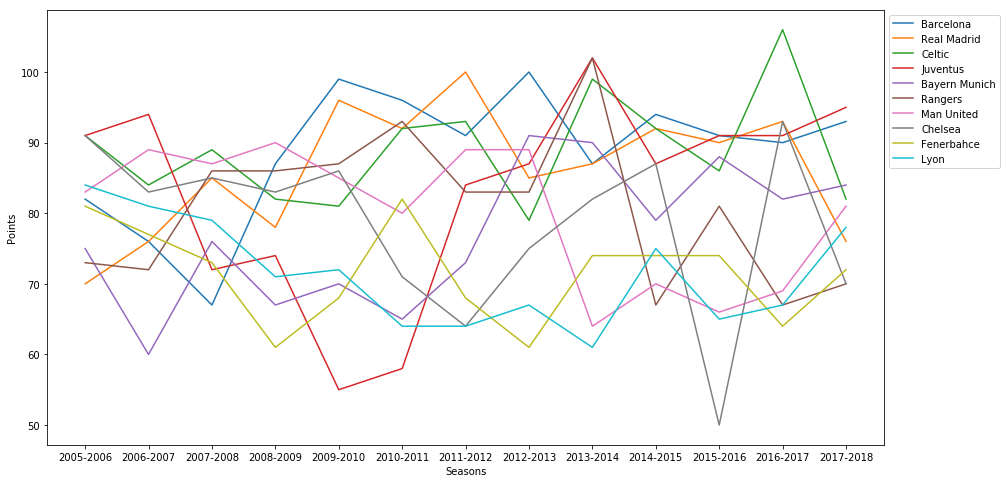

In [235]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("Seasons")
plt.ylabel("Points")

for team in teams_list[0:10]:
    team_ses = team_ses_graf.filter(lambda x: (x[0][1]==team)).map(lambda x: (x[0][0], x[1])).sortByKey()
    ses_list = team_ses.keys().collect()
    points_list = team_ses.values().collect()

    plt.plot(ses_list, points_list)

plt.legend(teams_list, bbox_to_anchor=(1,1))
